## Feature Engineering

In [79]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Reading input data
df = pd.read_csv('Purchased_Dt.csv')
print(df.dtypes)
print(df.head())
print(df.info())

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object
    User ID  Gender   Age  EstimatedSalary  Purchased
0  15624510    Male  19.0          19000.0          0
1  15810944    Male  35.0          20000.0          0
2  15668575  Female  26.0          43000.0          0
3  15603246  Female  27.0          57000.0          0
4  15804002    Male  19.0          76000.0          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             395 non-null object
Age                397 non-null float64
EstimatedSalary    398 non-null float64
Purchased          400 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.7+ KB
None


In [3]:
userid=df['User ID']

In [83]:
df=df[['Gender','Age','EstimatedSalary', 'Purchased']]
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0


In [84]:
# df['User ID']=df['User ID'].astype('object')
# df['Purchased']=df['Purchased'].astype('object')
print(df.dtypes)

Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object


In [92]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [93]:
print("Purchased:\n",df['Purchased'].value_counts())
print("\nGender:\n",df['Gender'].value_counts())

Purchased:
 0    257
1    143
Name: Purchased, dtype: int64

Gender:
 Female    207
Male      193
Name: Gender, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012187FF7160>,
      dtype=object)

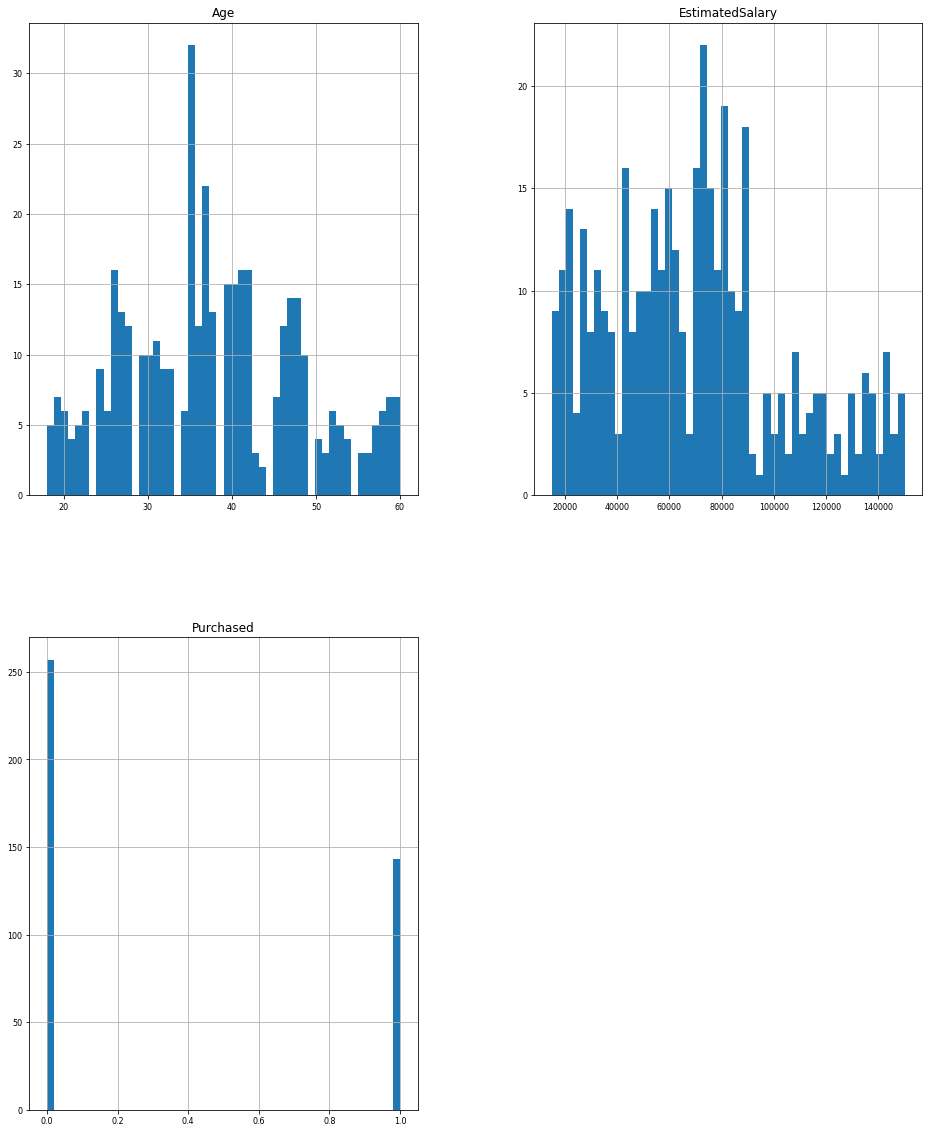

In [94]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [8]:
## Filling NAs for Categorical Variables
df['Gender'].fillna(df['Gender'].value_counts().idxmax(),inplace=True)

In [9]:
## Filling NAs for Continuous Variables
df['Age'].fillna(df['Age'].median(),inplace=True)
df['EstimatedSalary'].fillna(df['EstimatedSalary'].median(),inplace=True)

In [95]:
## Create new column using age
def age_grp(x):
    if (x<=30):
        return("Young")
    elif(x>30 and x<=45):
        return("Middle_Age")
    else:
        return("Senior")

df['Age_Group'] = df['Age'].apply(lambda x:age_grp(x))

In [96]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group
0,Male,19.0,19000.0,0,Young
1,Male,35.0,20000.0,0,Middle_Age
2,Female,26.0,43000.0,0,Young
3,Female,27.0,57000.0,0,Young
4,Male,19.0,76000.0,0,Young


#### variable encoding

In [97]:
## label encoding of multiple variable
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [98]:
## label encoding of variable Gender
df=MultiColumnLabelEncoder(columns = ['Gender']).fit_transform(df)

In [14]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group
0,1,19.0,19000.0,0,Young
1,1,35.0,20000.0,0,Middle_Age
2,0,26.0,43000.0,0,Young
3,0,27.0,57000.0,0,Young
4,1,19.0,76000.0,0,Young


In [99]:
## One hot encoding of variable Age_Group
df1 = pd.get_dummies(df, columns =['Age_Group'], drop_first=True)
df1.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group_Senior,Age_Group_Young
0,1,19.0,19000.0,0,0,1
1,1,35.0,20000.0,0,0,0
2,0,26.0,43000.0,0,0,1
3,0,27.0,57000.0,0,0,1
4,1,19.0,76000.0,0,0,1


In [100]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group
0,1,19.0,19000.0,0,Young
1,1,35.0,20000.0,0,Middle_Age
2,0,26.0,43000.0,0,Young
3,0,27.0,57000.0,0,Young
4,1,19.0,76000.0,0,Young


### Chi-Square test to know the relationship between 'Gender' and 'Purchased' event:
    H0:There is no statistically significant relationship between 'Gender' and 'Purchased' event.
    Ha:There is a statistically significant relationship between 'Gender' and 'Purchased' event.

Purchased    0    1  All
Gender                  
0          128   79  207
1          129   64  193
All        257  143  400


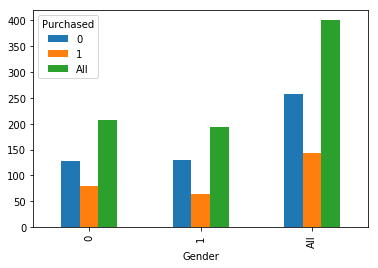

In [101]:
##frequency count table
contingency_table = pd.crosstab(
    df['Gender'],
    df['Purchased'],
    margins = True
)

print(contingency_table)
contingency_table.plot(kind='bar')

#### The Chi-Squared Test for Independence - Calculation with Numpy

In [25]:
# X2=(obs-exp)^2/exp
# Where X2 is the test statistic, observecd are values we have in the contingency table,
# expected are values we would expect assuming the null hypothesis is true.
# Theoretically speaking, if all the expected values are equal to the observed values, then the X2 statistic will be 0.
# As a result, the null hypothesis will be retained.
f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)
print(f_obs)
row_sums = contingency_table.iloc[0:2,2].values
print(row_sums)
col_sums = contingency_table.iloc[2,0:2].values
print(col_sums)

# Expected # of Females in the '0' Purchase event Category=
# (Total # of Females ∗ Number of People in the '0' Purchase Category)/Total # of People
total = contingency_table.loc['All', 'All']

f_expected = []
for j in range(2):
    for i in col_sums:
        f_expected.append(i*row_sums[j]/total)
print(f_expected)

chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

dof = (len(row_sums)-1)*(len(col_sums)-1)
print("Degrees of Freedom: {}".format(dof))

[128  79 129  64]
[207 193]
[257 143]
[132.9975, 74.0025, 124.0025, 68.9975]
Chi-squared Statistic: 1.088651221756884
Degrees of Freedom: 1


In [26]:
## with scipy library
f_obs = np.array([contingency_table.iloc[0][0:2].values,
                  contingency_table.iloc[1][0:2].values])
f_obs

from scipy import stats
stats.chi2_contingency(f_obs)[0:3] ## x^2=(obs-exp)^2/exp, p-value, df(DoF=(Number of rows−1)∗(Number of columns−1))

(0.8817094647236579, 0.34773389797731946, 1)

In [27]:
## Anova 
##The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean
stats.f_oneway(df[df['Age_Group']=='Young']['Age'],
               df[df['Age_Group']=='Senior']['Age'],df[df['Age_Group']=='Middle_Age']['Age'])

F_onewayResult(statistic=1205.5802512930723, pvalue=2.2292725147148165e-169)

In [28]:
df.head()

,Gender,Age,EstimatedSalary,Purchased,Age_Group
0,1,19.0,19000.0,0,Young
1,1,35.0,20000.0,0,Middle_Age
2,0,26.0,43000.0,0,Young
3,0,27.0,57000.0,0,Young
4,1,19.0,76000.0,0,Young


In [60]:
## Feature selection with Lasso Regularization
x = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty="l1", random_state=10)
clf.fit(x,y)
thetaLasso=clf.coef_
print("The regularized theta using lasso regression:\n",thetaLasso.reshape(3,1))

The regularized theta using lasso regression:
 [[0.00000000e+00]
 [1.90796119e-01]
 [2.91203442e-05]]


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
## Feature selection with Ensemble method
x = df[['Gender','Age','EstimatedSalary']]
y = df['Purchased']
## Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)
# Creating random forest classifier object
RFclassifier = RandomForestClassifier(n_estimators=200,random_state=5)
## Fit the model with train and test data
RFclassifier.fit(x_train,y_train)
## Predict target variable with test data
y_pred = RFclassifier.predict(x_test)
## Find accuracy score using predicted and actual
metrics.accuracy_score(y_test,y_pred)

In [72]:
RFclassifier.feature_importances_

array([0.0110715 , 0.51819762, 0.47073088])

In [73]:
x_train.head()

,Gender,Age,EstimatedSalary
24,1,46.0,23000.0
33,0,28.0,44000.0
396,0,51.0,23000.0
273,1,39.0,106000.0
246,0,35.0,50000.0


In [74]:
## Defining X and y variables
## We are droping off the 'Gender' feature as it is not significant whereas we are taking age as it shown significance
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

## Running Random forest model with selected features
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)

RFclassifier = RandomForestClassifier(n_estimators=200,random_state=5)

RFclassifier.fit(x_train,y_train)

y_pred = RFclassifier.predict(x_test)

metrics.accuracy_score(y_test,y_pred)

0.88

In [65]:
RFclassifier.feature_importances_

array([0.50443779, 0.49556221])

In [66]:
x_train.head()

,Age,EstimatedSalary
382,44.0,139000.0
84,30.0,62000.0
115,40.0,57000.0
328,36.0,118000.0
99,28.0,37000.0


In [76]:
## Running model with different parameters
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)

RFclassifier = RandomForestClassifier(n_estimators=300)

RFclassifier.fit(x_train,y_train)

y_pred = RFclassifier.predict(x_test)

metrics.accuracy_score(y_test,y_pred)

0.89

In [77]:
RFclassifier.feature_importances_

array([0.50933256, 0.49066744])

In [78]:
x_train.head()

,Age,EstimatedSalary
382,44.0,139000.0
84,30.0,62000.0
115,40.0,57000.0
328,36.0,118000.0
99,28.0,37000.0
